In [1]:
from dataset import torch, os, LocalDataset, transforms, np, get_class, num_classes, preprocessing, Image, m, s
from config import *

from torch import nn
from torch.optim import SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision.models import resnet, vgg

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import tensorflow

from matplotlib import pyplot as plt
from numpy import unravel_index
import gc
import argparse
import pandas as pd 

Classes: 
{'\\audi_a4_2007\\': 0, '\\bmw_325i_2006\\': 1, '\\bmw_328i_2007\\': 2, '\\cadillac_cts_2005\\': 3, '\\chevrolet_blazer_1999\\': 4, '\\chevrolet_cobalt_2008\\': 5, '\\chevrolet_corvette_1994\\': 6, '\\chevrolet_cruze_2013\\': 7, '\\chevrolet_hhr_2006\\': 8, '\\chevrolet_silverado_2002\\': 9, '\\chevrolet_tahoe_2002\\': 10, '\\chrysler_sebring_2002\\': 11, '\\civic_honda\\': 12, '\\dodge_charger_2007\\': 13, '\\dodge_dakota_2000\\': 14, '\\dodge_grand_caravan_2005\\': 15, '\\dodge_grand_caravan_2010\\': 16, '\\dodge_neon_2005\\': 17, '\\dodge_ram_2500_2004\\': 18, '\\ford_escape_2006\\': 19, '\\ford_expedition_2005\\': 20, '\\ford_f150_2005\\': 21, '\\ford_focus_2001\\': 22, '\\ford_fusion_2007\\': 23, '\\ford_mustang_2000\\': 24, '\\ford_mustang_2001\\': 25, '\\ford_mustang_2010\\': 26, '\\ford_ranger_2001\\': 27, '\\gmc_yukon_1500_2000\\': 28, '\\honda_accord\\': 29, '\\honda_accord_2003\\': 30, '\\honda_city\\': 31, '\\honda_civic_1996\\': 32, '\\honda_civic_coupe_2000\\': 

In [2]:
mean=m
std_dev=s
print(m,s)
transform = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std_dev)])

tensor([2.2810, 2.2651, 2.2317]) tensor([8.9741e+08, 8.9168e+08, 8.7895e+08])


In [3]:
classes = {"num_classes": len(num_classes)}
resnet152_model = resnet.resnet152(pretrained=False, **classes)
model_name="resnet152"
model=resnet152_model

#print (str(RESULTS_PATH) + "/" + str(model_name) + "/" + str(model_name) + ".pt")
#model.load_state_dict(torch.load(str(RESULTS_PATH) + "/" + str(model_name) + "/" + str(model_name) + ".pt"))

import torch

# Define your model class
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your model architecture here

    def forward(self, x):
        # Define the forward pass of your model
        return x

# Define the file path where the model is saved
model_path = "results/resnet152/resnet152.pt"

# Create an instance of your model
model = MyModel()

c:\Users\PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\PRADEEP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
def test_sample(image_path, model=model, model_name=model_name):
    im = Image.open(image_path).convert("RGB")
    im = transform(im)

    if USE_CUDA and torch.cuda.is_available():
        model = model.cuda()
    model.eval()

    x = Variable(im.unsqueeze(0))

    if USE_CUDA and torch.cuda.is_available():
        x = x.cuda()
        pred = model(x).data.cuda().cpu().numpy().copy()
    else:
        pred = model(x).data.numpy().copy()

    #print (pred)

    idx_max_pred = np.argmax(pred)
    idx_classes = idx_max_pred % classes["num_classes"]
    #print(get_class(idx_classes))
    return get_class(idx_classes)

In [5]:
df = pd.DataFrame(columns=['images','name'])

In [6]:
df=df[0:0]

In [7]:
df

,images,name


In [8]:
inp="G:/Final project/Web/cars/"
files = os.listdir(inp)
files.sort()

for i in files:
    print(test_sample(inp+i))
    df.loc[len(df.index)]=[i,test_sample(inp+i)]

{'\\audi_a4_2007\\': 0, '\\bmw_325i_2006\\': 1, '\\bmw_328i_2007\\': 2, '\\cadillac_cts_2005\\': 3, '\\chevrolet_blazer_1999\\': 4, '\\chevrolet_cobalt_2008\\': 5, '\\chevrolet_corvette_1994\\': 6, '\\chevrolet_cruze_2013\\': 7, '\\chevrolet_hhr_2006\\': 8, '\\chevrolet_silverado_2002\\': 9, '\\chevrolet_tahoe_2002\\': 10, '\\chrysler_sebring_2002\\': 11, '\\civic_honda\\': 12, '\\dodge_charger_2007\\': 13, '\\dodge_dakota_2000\\': 14, '\\dodge_grand_caravan_2005\\': 15, '\\dodge_grand_caravan_2010\\': 16, '\\dodge_neon_2005\\': 17, '\\dodge_ram_2500_2004\\': 18, '\\ford_escape_2006\\': 19, '\\ford_expedition_2005\\': 20, '\\ford_f150_2005\\': 21, '\\ford_focus_2001\\': 22, '\\ford_fusion_2007\\': 23, '\\ford_mustang_2000\\': 24, '\\ford_mustang_2001\\': 25, '\\ford_mustang_2010\\': 26, '\\ford_ranger_2001\\': 27, '\\gmc_yukon_1500_2000\\': 28, '\\honda_accord\\': 29, '\\honda_accord_2003\\': 30, '\\honda_city\\': 31, '\\honda_civic_1996\\': 32, '\\honda_civic_coupe_2000\\': 33, '\\hon

In [9]:
df

,images,name
0,1.jpg,\mini_cooper_2008\
1,10.jpg,\honda_pilot_2006\
2,12.jpg,\ford_expedition_2005\
3,16.jpg,\honda_odyssey_2005\
4,17.jpg,\wuling_sunshine\
5,18.jpg,\volvo_xc90_2004\
6,2.jpg,\toyota_corolla_1998\
7,22.jpg,\honda_pilot_2006\
8,24.jpg,\ford_expedition_2005\
9,28.jpg,\honda_odyssey_2005\


In [10]:
import cv2
from PIL import Image 
from IPython.display import display
 

In [11]:
def clean_string(s):
    s = s.lower().replace('_', ' ').replace('\\', '')
    s = s.split()
    s.pop()
    s=' '.join(s)
    print(s)
    return s

In [12]:
df['clean_name'] = df['name'].apply(clean_string)

mini cooper
honda pilot
ford expedition
honda odyssey
wuling
volvo xc90
toyota corolla
honda pilot
ford expedition
honda odyssey
wuling
honda odyssey
volvo xc90
honda pilot
ford expedition
wuling
wuling
volvo xc90
nissan altima
nissan 350z
volkswagen rabbit


In [13]:
df

,images,name,clean_name
0,1.jpg,\mini_cooper_2008\,mini cooper
1,10.jpg,\honda_pilot_2006\,honda pilot
2,12.jpg,\ford_expedition_2005\,ford expedition
3,16.jpg,\honda_odyssey_2005\,honda odyssey
4,17.jpg,\wuling_sunshine\,wuling
5,18.jpg,\volvo_xc90_2004\,volvo xc90
6,2.jpg,\toyota_corolla_1998\,toyota corolla
7,22.jpg,\honda_pilot_2006\,honda pilot
8,24.jpg,\ford_expedition_2005\,ford expedition
9,28.jpg,\honda_odyssey_2005\,honda odyssey


In [25]:
val="ford expedition"
print(val)
is_present= df['clean_name'].str.contains(val, case=False)
plen=is_present.sum()
is_present

ford expedition


0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20    False
Name: clean_name, dtype: bool

In [15]:
df

,images,name,clean_name
0,1.jpg,\mini_cooper_2008\,mini cooper
1,10.jpg,\honda_pilot_2006\,honda pilot
2,12.jpg,\ford_expedition_2005\,ford expedition
3,16.jpg,\honda_odyssey_2005\,honda odyssey
4,17.jpg,\wuling_sunshine\,wuling
5,18.jpg,\volvo_xc90_2004\,volvo xc90
6,2.jpg,\toyota_corolla_1998\,toyota corolla
7,22.jpg,\honda_pilot_2006\,honda pilot
8,24.jpg,\ford_expedition_2005\,ford expedition
9,28.jpg,\honda_odyssey_2005\,honda odyssey


In [26]:
res=df[is_present]
res

,images,name,clean_name
2,12.jpg,\ford_expedition_2005\,ford expedition
8,24.jpg,\ford_expedition_2005\,ford expedition
14,36.jpg,\ford_expedition_2005\,ford expedition


G:/Final project/Web/cars/12.jpg


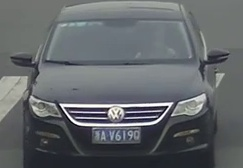

G:/Final project/Web/cars/24.jpg


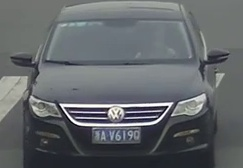

G:/Final project/Web/cars/36.jpg


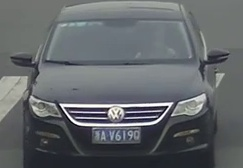

Value not found.


In [27]:
res=df[is_present]
for i in range(plen):
    if not res.empty:
        result_value = res['images'].values[i]
        print(inp+result_value)
    
# creating a object 
        im = Image.open(inp+result_value) 
        display(im)
else:
    print("Value not found.")

In [ ]:
test_sample("G:/databasesmall/new man/bmw_328i_2007/bmw_328i_2007_02.jpg")

In [ ]:
test_sample("sample/honday.jpg")

In [ ]:
test_sample("sample/nissan.jpg")

In [ ]:
test_sample("sample/nissan2.jpg")

In [ ]:
test_sample("sample/nissan_1.jpg")

In [ ]:
test_sample("sample/nissanx.jpg")

## Test con immagini prese dal web

In [ ]:
test_sample("sample/ford_web.png")

In [ ]:
test_sample("sample/honda_web.jpeg")

In [ ]:
test_sample("sample/nissan_web.jpeg")

In [ ]:
test_sample("sample/ford_explor.jpg")

In [ ]:
from glob import glob
ford = glob("test_images/Ford_Explorer/*")
nissan = glob("test_images/Nissan_Altima/*")
honda = glob("test_images/Honda_Civic/*")

In [ ]:
ford_results = ""
for f in ford:
    ford_results += f+","+test_sample(f)+"\n"

In [ ]:
nissan_results = ""
count = 0
for f in nissan:
    out = test_sample(f)
    if out == "2_nissan_altima":
        count+=1
    nissan_results += f+","+out+"\n"
print (count)

In [ ]:
honda_results = ""
for f in honda:
    honda_results += f+","+test_sample(f)+"\n"

In [ ]:
file = open("ford.csv", "w+")
file.write(ford_results)
file.close()

In [ ]:
file = open("nissan.csv", "w+")
file.write(nissan_results)
file.close()

In [ ]:
file = open("honda.csv", "w+")
file.write(honda_results)
file.close()